<a href="https://www.kaggle.com/code/aneevinay/uber-data-prediction?scriptVersionId=256098675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction

In recent years, ride-hailing services have become a cornerstone of urban mobility. However, one of the persistent challenges in this sector is booking cancellations—either by the customer or the driver. These cancellations not only disrupt service efficiency but also affect customer satisfaction and business revenue.

This project aims to analyze and predict booking cancellations using a real-world dataset that includes details like booking status, ride distance, customer and driver ratings, payment method, and time of booking. By identifying key factors leading to cancellations, we can build a machine learning model to predict the likelihood of a ride being cancelled in advance.

The insights drawn from this model can help businesses optimize driver allocation, minimize customer churn, and improve overall operational efficiency.

# Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read the Data

In [2]:
df=pd.read_csv('/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv')

# Check the Data

In [3]:
df.shape

(150000, 21)

## Glimpse the Data

In [4]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


## Check Missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [6]:
df['DateTime']= pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [7]:
df['Booking Status'].unique()

array(['No Driver Found', 'Incomplete', 'Completed',
       'Cancelled by Driver', 'Cancelled by Customer'], dtype=object)

"No Driver Found" means no ride happened — so it makes perfect sense to drop those rows

In [8]:
df = df[df['Booking Status'] != 'No Driver Found']

## Data Unbalance

In [9]:
df['Is_Cancelled'] = df['Booking Status'].apply(
    lambda x: 1 if 'Cancelled' in x else 0
)

In [10]:
df['Is_Cancelled'].value_counts(normalize=True) * 100

Is_Cancelled
0    73.11828
1    26.88172
Name: proportion, dtype: float64

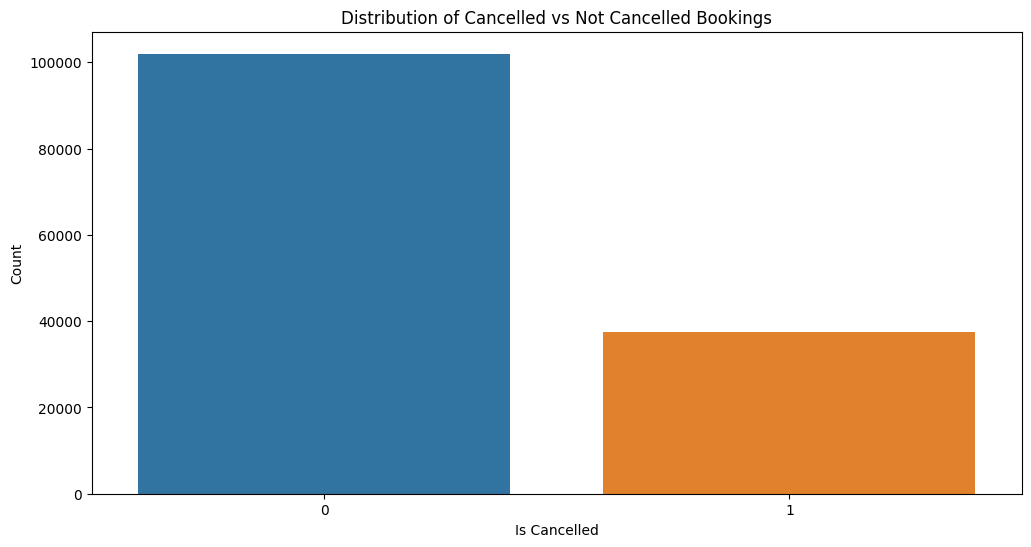

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x='Is_Cancelled', data=df)
plt.title("Distribution of Cancelled vs Not Cancelled Bookings")
plt.xlabel("Is Cancelled")
plt.ylabel("Count")
plt.show()


The Data is ubalanced with more **'not Cancelled'** values.

# Data Exploration

## Explore Categorical features


Booking ID value counts (Top 10):
Booking ID
"CNR5292943"    3
"CNR3648267"    3
"CNR6337479"    3
"CNR7642097"    3
"CNR9603232"    3
"CNR2726142"    3
"CNR7585544"    3
"CNR7908610"    3
"CNR7199036"    3
"CNR8621548"    2
Name: count, dtype: int64


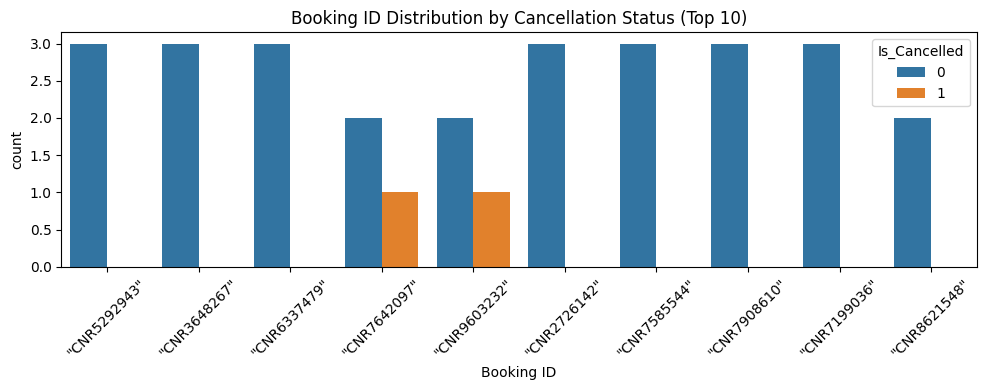


Booking Status value counts (Top 10):
Booking Status
Completed                93000
Cancelled by Driver      27000
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


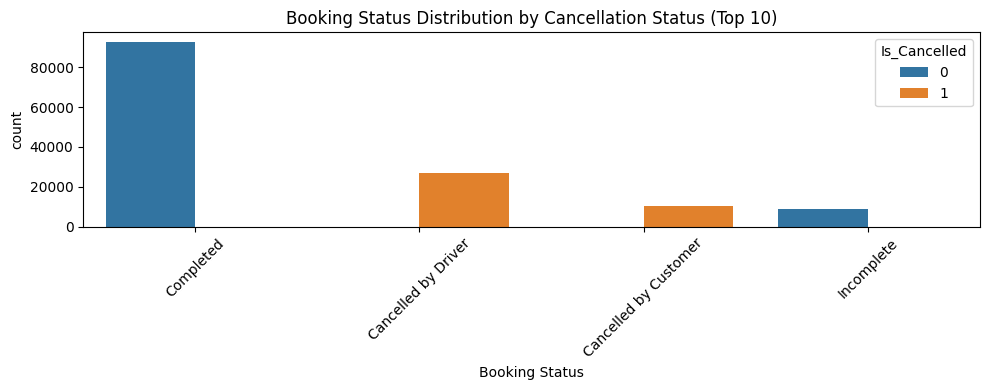


Customer ID value counts (Top 10):
Customer ID
"CID4523979"    3
"CID8727691"    3
"CID5481002"    3
"CID7828101"    3
"CID6468528"    3
"CID4676543"    2
"CID7388272"    2
"CID3448023"    2
"CID7822138"    2
"CID2375060"    2
Name: count, dtype: int64


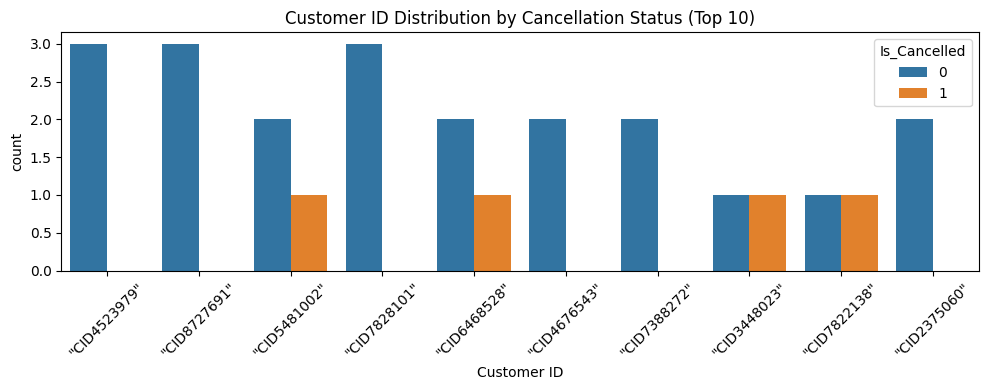


Vehicle Type value counts (Top 10):
Vehicle Type
Auto             34738
Go Mini          27791
Go Sedan         25181
Bike             21014
Premier Sedan    16831
eBike             9811
Uber XL           4134
Name: count, dtype: int64


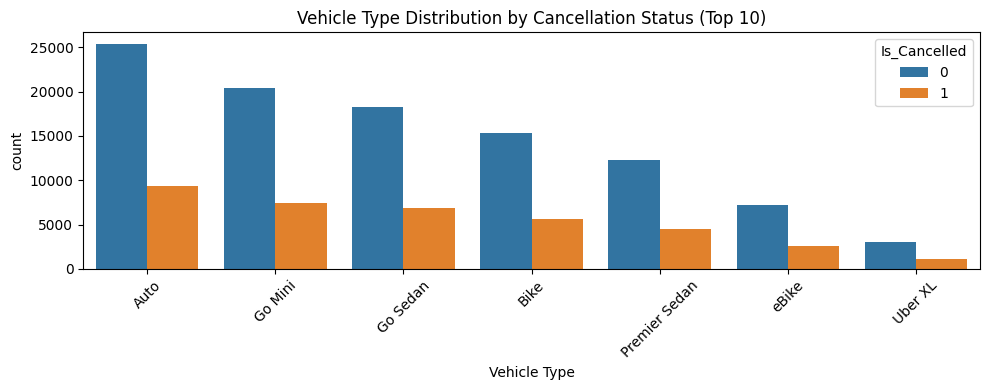


Pickup Location value counts (Top 10):
Pickup Location
Khandsa             888
Barakhamba Road     888
Saket               866
Badarpur            859
Shivaji Park        856
Madipur             856
AIIMS               855
Pragati Maidan      850
Vishwavidyalaya     847
Dwarka Sector 21    846
Name: count, dtype: int64


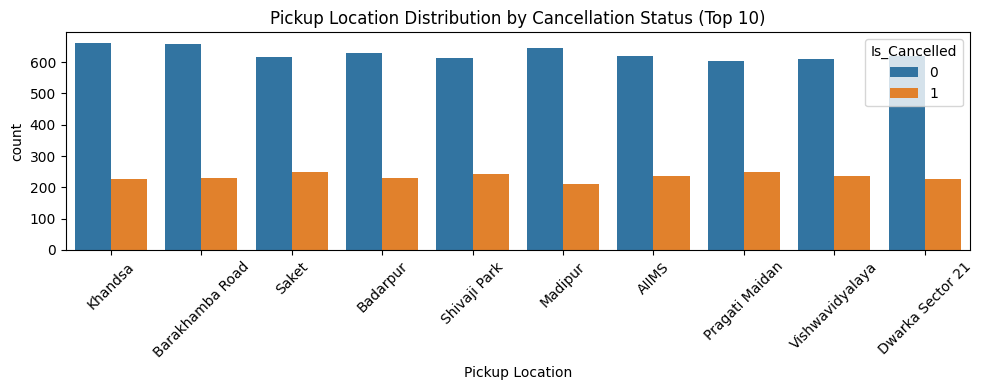


Drop Location value counts (Top 10):
Drop Location
Ashram                883
Basai Dhankot         857
Narsinghpur           854
Lok Kalyan Marg       847
Udyog Vihar           847
Nehru Place           843
Punjabi Bagh          842
Cyber Hub             841
Lajpat Nagar          841
Kashmere Gate ISBT    840
Name: count, dtype: int64


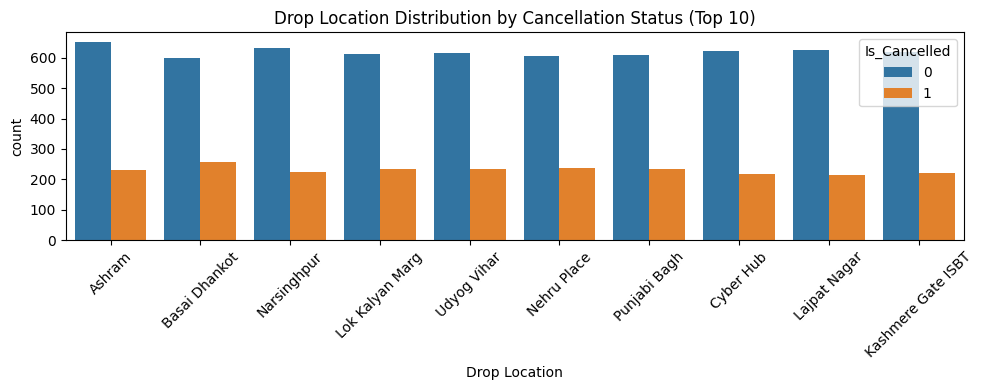


Reason for cancelling by Customer value counts (Top 10):
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64


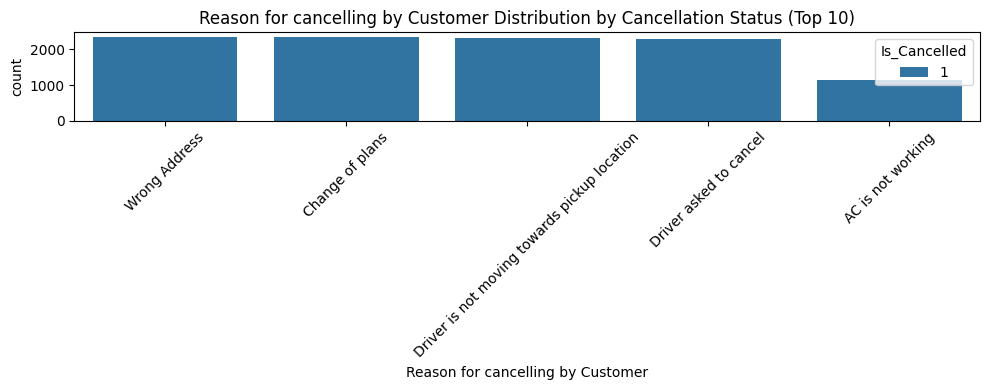


Driver Cancellation Reason value counts (Top 10):
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64


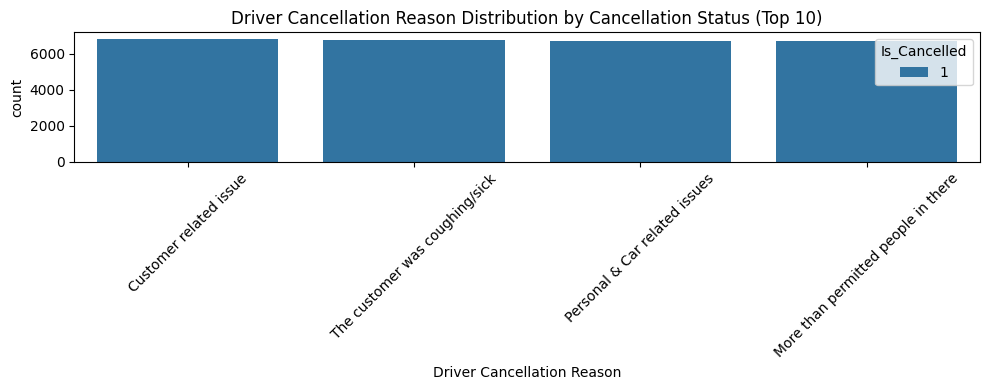


Incomplete Rides Reason value counts (Top 10):
Incomplete Rides Reason
Customer Demand      3040
Vehicle Breakdown    3012
Other Issue          2948
Name: count, dtype: int64


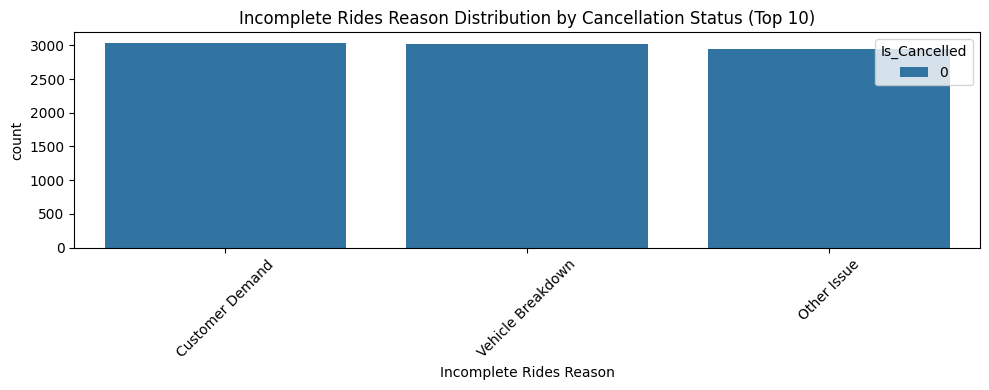


Payment Method value counts (Top 10):
Payment Method
UPI            45909
Cash           25367
Uber Wallet    12276
Credit Card    10209
Debit Card      8239
Name: count, dtype: int64


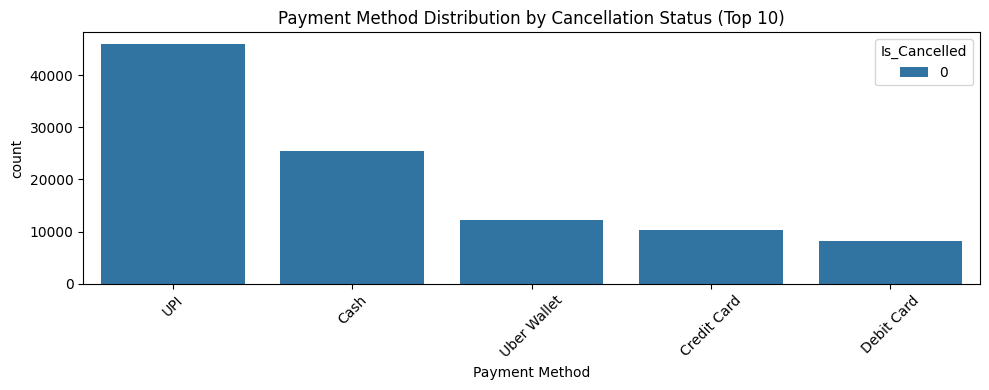

In [12]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} value counts (Top 10):")
    top_10_values = df[col].value_counts().nlargest(10)
    print(top_10_values)

    plt.figure(figsize=(10, 4))
    sns.countplot(
        data=df[df[col].isin(top_10_values.index)],
        x=col,
        hue='Is_Cancelled',
        order=top_10_values.index
    )
    plt.title(f'{col} Distribution by Cancellation Status (Top 10)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()